# Exploratory Data Analysis: WebMD Reviews of Type 2 Diabetes Treatments

## Introduction:
Project Description:
[Enter text here]

### Contents:
 - Read in scraped data
 - Perform QA on data from scrape
 - Exploratory Data Analysis
 - Insights

#### Read in scraped data:
First, let's import numpy and pandas, and read in the scraped data.

In [305]:
import numpy as np
import pandas as pd

In [306]:
reviews = pd.read_csv('webmd_reviews.csv')

Take a look at some sample data

In [307]:
reviews.sample(10)

,Rdate,comment,condition,drug,easeofuse,effectiveness,helpful,reviewer,satisfaction
3919,2/14/2009 12:43:15 AM,NaN,Type 2 Diabetes Mellitus,Januvia oral,5,4,9,"PATRICIA, 55-64 Female on Treatment for 1 to ...",5
4490,2/11/2010 11:35:35 AM,"I started using this medication 2 years ago, a...",Additional Medication for Diabetes Type 2,Byetta subcutaneous,4,5,1,"mickey, 55-64 Female on Treatment for 2 to le...",4
2342,12/17/2016 2:49:19 PM,NaN,Type 2 Diabetes Mellitus,metformin oral,5,1,1,"stuff1966, 45-54 Male on Treatment for 2 to l...",1
3791,5/8/2019 3:08:12 PM,NaN,Type 2 Diabetes Mellitus,Actos oral,2,2,3,"jackie, 55-64 Female on Treatment for less th...",1
1601,9/13/2009 4:31:15 PM,NaN,Type 2 Diabetes Mellitus,metformin oral,3,5,1,"marie, 55-64 Female on Treatment for 6 months...",3
4571,12/5/2011 2:33:16 PM,NaN,Additional Medication for Diabetes Type 2,Byetta subcutaneous,5,5,8,55-64 Female on Treatment for 1 to 6 months (...,3
5299,2/8/2012 8:43:31 PM,NaN,Type 2 Diabetes Mellitus,glimepiride oral,5,5,9,"lucyl0407, 35-44 Female on Treatment for less...",5
1595,9/11/2009 6:46:49 PM,NaN,Type 2 Diabetes Mellitus,metformin oral,4,2,6,"NETTY22, 65-74 Female on Treatment for less t...",1
1977,8/30/2011 1:27:19 PM,NaN,Type 2 Diabetes Mellitus,metformin oral,3,3,1,"emily, 55-64 Female on Treatment for 2 to les...",2
235,8/1/2018 11:29:56 PM,NaN,Type 2 Diabetes Mellitus,Trulicity subcutaneous,5,5,3,"Berwyn Friedman, 75 or over on Treatment for 2...",1


In [308]:
reviews.columns

Index(['Rdate', 'comment', 'condition', 'drug', 'easeofuse', 'effectiveness',
       'helpful', 'reviewer', 'satisfaction'],
      dtype='object')

#### Perform Basic QA

Now let's check against WebMD to ensure counts and classifications were scraped as expected.

Reference URL: https://www.webmd.com/drugs/2/condition-594/type%202%20diabetes%20mellitus

How many reviews did we pull?

In [309]:
len(reviews.drug)

5495

How many unique drugs with reviews did we scrape?

In [310]:
reviews['drug'].nunique()

70

How many reviews from each drug did we scrape?

In [311]:
reviews['drug'].value_counts()

metformin oral                               1227
Actos oral                                    622
Januvia oral                                  440
Byetta subcutaneous                           373
Janumet oral                                  208
glipizide oral                                195
Invokana oral                                 193
glimepiride oral                              172
Trulicity subcutaneous                        126
Glucophage oral                               111
Bydureon subcutaneous                         110
Onglyza oral                                  106
glyburide oral                                101
Avandia oral                                   96
Amaryl oral                                    95
Tradjenta oral                                 90
Farxiga oral                                   72
Actoplus MET oral                              68
Kombiglyze XR oral                             58
Levemir Flexpen subcutaneous                   56


We searched for "Type 2 Diabetes Mellitus" on WebMD, but are these the only conditions?  Let's check.

In [312]:
reviews['condition'].value_counts()

Type 2 Diabetes Mellitus                     4955
Additional Medication for Diabetes Type 2     483
Diabetes                                       41
Type 1 Diabetes Mellitus                       16
Name: condition, dtype: int64

Ok, so 90% of our reviews are specifically for Type II Diabetes Mellitus, 9% on "Additional Medication for Type II"

In [313]:
reviews['reviewer'].nunique()

3916

Check for null values.

In [314]:
np.sum(reviews.isnull())

Rdate               0
comment          4520
condition           0
drug                0
easeofuse           0
effectiveness       0
helpful             0
reviewer          253
satisfaction        0
dtype: int64

Uh oh!  4,520 null comments out of 5,495 reviews...this can't be right. Let's grab examples and debug.

In [315]:
reviews.loc[reviews.isnull().any(axis=1), :]

,Rdate,comment,condition,drug,easeofuse,effectiveness,helpful,reviewer,satisfaction
1,9/18/2007 11:18:23 AM,NaN,Type 2 Diabetes Mellitus,metformin oral,5,4,9,"cutie54, 45-54 Female on Treatment for 1 to 6...",5
3,4/5/2011 1:31:52 PM,NaN,Type 2 Diabetes Mellitus,Kombiglyze XR oral,5,4,4,25-34 Female on Treatment for less than 1 mon...,4
4,3/7/2011 4:35:50 PM,NaN,Type 2 Diabetes Mellitus,Kombiglyze XR oral,3,1,8,45-54 Male (Patient),1
6,3/25/2015 12:19:46 PM,NaN,Type 2 Diabetes Mellitus,Afrezza inhalation,5,5,9,"tipe2, 35-44 Male on Treatment for less than ...",5
7,3/24/2015 5:08:47 PM,NaN,Type 2 Diabetes Mellitus,Afrezza inhalation,1,1,1,55-64 Female on Treatment for 1 to 6 months (...,1
9,10/21/2007 10:23:33 AM,NaN,Type 2 Diabetes Mellitus,Actoplus MET oral,5,5,2,35-44 Male on Treatment for 1 to less than 2 ...,5
10,10/14/2007 9:24:09 PM,NaN,Type 2 Diabetes Mellitus,Actoplus MET oral,5,5,6,"muzings, 45-54 Male on Treatment for 6 months...",5
11,10/14/2007 8:59:09 PM,NaN,Type 2 Diabetes Mellitus,Actoplus MET oral,4,4,4,55-64 Female on Treatment for 6 months to les...,4
13,5/7/2014 3:05:19 PM,NaN,Type 2 Diabetes Mellitus,Farxiga oral,5,4,2,"Karmacomes knockin, 55-64 Female",4
15,9/21/2007 10:48:32 AM,love it,Type 2 Diabetes Mellitus,Avandia oral,3,3,4,NaN,4


Note: Identified bugs in review parser that caused nulls in 'comment' field. There ARE some blank comments on WebMD, but not on 80% of reviews! The 253 null 'reviewer's are genuinely blank fields on the website.

Debugged spider to fix review parsing.  Before re-crawling, let's take a look at ratings fields (below).

Now let's see some summary stats for our ratings!

In [316]:
reviews.describe()

,easeofuse,effectiveness,helpful,satisfaction
count,5495.000000,5495.000000,5495.000000,5495.000000
mean,4.055505,3.442038,3.079709,3.052957
std,1.246186,1.425960,2.591082,1.596296
min,1.000000,1.000000,0.000000,1.000000
25%,3.000000,2.000000,1.000000,1.000000
50%,5.000000,4.000000,2.000000,3.000000
75%,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,9.000000,5.000000


Note: 'easeofuse', 'effectiveness', and 'satisfaction' fields are all 5-max ratings; however, 'helpful' is a counter where users upvote. '9' as a max isn't correct.  After reviewing site and finding examples from .loc table above, I identified a bug in the code that limited length of field to one integer. Fixed in code to allow more than 1 integer and rerun spider.

After debugging review parser in webmd_spider for 'helpful' and 'comment' fields, re-crawling WebMD.

##### QA round 2:
...2 hours later...

Load 2nd-round file and QA again!

In [317]:
reviews = pd.read_csv('webmd_reviews2.csv')

In [318]:
reviews.sample(10)

,Rdate,comment,condition,drug,easeofuse,effectiveness,helpful,reviewer,satisfaction
4696,9/12/2012 3:56:36 PM,I am dealing with stomach ache and pain someti...,Type 2 Diabetes Mellitus,Janumet oral,5,5,3,"bclark878, 55-64 Female on Treatment for 2 to...",5
2328,3/18/2008 10:23:42 AM,just startd taking it,Type 2 Diabetes Mellitus,Fortamet oral,5,3,0,NaN,3
306,5/9/2015 2:53:30 PM,Caused UI all the time. Released too much sugar,Type 2 Diabetes Mellitus,Farxiga oral,3,1,11,65-74 Female on Treatment for 10 years or mor...,1
4399,11/1/2009 2:49:11 AM,I have lost 7 pounds over the last 4 months on...,Additional Medication for Diabetes Type 2,Byetta subcutaneous,5,4,10,"StaceyinMI, 35-44 Female on Treatment for 1 t...",4
283,10/2/2014 9:58:13 AM,I have been on this medication for 1 month now...,Type 2 Diabetes Mellitus,Farxiga oral,5,5,22,"MB, 35-44 Male on Treatment for 1 to 6 months...",5
4324,1/18/2009 9:23:41 AM,"I have been on Byetta for one week now, and si...",Additional Medication for Diabetes Type 2,Byetta subcutaneous,5,5,1,"Harry, 55-64 Male on Treatment for 2 to less ...",4
2292,1/2/2010 11:55:08 PM,Brought my glucose levels down to normal range...,Type 2 Diabetes Mellitus,Glucotrol XL oral,5,4,1,45-54 Female on Treatment for 5 to less than ...,5
2303,5/6/2012 1:46:09 AM,I have been using Humalog in my insulin pump f...,Type 1 Diabetes Mellitus,Apidra subcutaneous,5,4,2,"CRABBO71, 65-74 Male on Treatment for less th...",4
1578,7/9/2011 10:45:06 PM,"Unfortunately, I have recurring diarhea with t...",Type 2 Diabetes Mellitus,metformin oral,3,2,22,45-54 Female on Treatment for 5 to less than ...,1
3029,9/16/2010 12:22:24 AM,"it worked for about 3 years, then was inffectivee",Type 2 Diabetes Mellitus,Glucovance oral,5,5,2,"Stxipec2, 65-74 Male on Treatment for 5 to le...",5


In [319]:
np.sum(reviews.isnull())

Rdate              0
comment            9
condition          0
drug               0
easeofuse          0
effectiveness      0
helpful            0
reviewer         253
satisfaction       0
dtype: int64

In [320]:
reviews.describe()

,easeofuse,effectiveness,helpful,satisfaction
count,5495.000000,5495.000000,5495.000000,5495.000000
mean,4.055505,3.442038,9.202002,3.052957
std,1.246186,1.425960,9.672916,1.596296
min,1.000000,1.000000,0.000000,1.000000
25%,3.000000,2.000000,3.000000,1.000000
50%,5.000000,4.000000,7.000000,3.000000
75%,5.000000,5.000000,13.000000,5.000000
max,5.000000,5.000000,79.000000,5.000000


Looking good!  QA test complete.

#### Exploratory Data Analysis

Let's now dive into the content of the reviews, make some groupings, and analyze some trends identified in the data.

In [321]:
reviews = reviews.rename(columns= {'Rdate': 'Rdatetime'}) #rename Rdate to Rdatetime

Check data types:

In [322]:
reviews.dtypes

Rdatetime        object
comment          object
condition        object
drug             object
easeofuse         int64
effectiveness     int64
helpful           int64
reviewer         object
satisfaction      int64
dtype: object

Change Rdatetime from object to DateTime:

In [323]:
reviews['Rdatetime'] = pd.to_datetime(reviews['Rdatetime'])

In [324]:
reviews.sample(10)

,Rdatetime,comment,condition,drug,easeofuse,effectiveness,helpful,reviewer,satisfaction
304,2015-03-06 11:20:16,"My A1C has been up and down over the years, bu...",Type 2 Diabetes Mellitus,Farxiga oral,5,5,12,"yepitsme23, 35-44 Female on Treatment for 1 t...",5
2628,2016-12-21 09:30:03,I'm a type 2 diabetic for going on 10 years. I...,Type 2 Diabetes Mellitus,Onglyza oral,5,1,4,"reviewer diab, 55-64 Female on Treatment for ...",1
847,2008-01-25 12:39:32,"I have not experienced a weight loss, but rath...",Type 2 Diabetes Mellitus,metformin oral,4,4,13,"Larry, 55-64 Male on Treatment for 1 to 6 mon...",4
3080,2007-10-04 21:19:04,"The only problem has been nausea, sometimes ev...",Type 2 Diabetes Mellitus,Glucophage oral,5,5,13,"crazy, 35-44 Female on Treatment for 1 to les...",5
1779,2013-08-19 18:07:52,I have noticed a great deal of hair loss in to...,Type 2 Diabetes Mellitus,metformin oral,4,4,25,"Olaoluwa, 65-74 Male on Treatment for 6 month...",5
3810,2008-10-24 14:31:34,I have Diabetes type II. i was given Januvia t...,Type 2 Diabetes Mellitus,Januvia oral,4,4,16,"lovingi it, 35-44 Female on Treatment for les...",5
5283,2016-10-18 12:28:48,I had tried metformina and Onglyza before and ...,Type 2 Diabetes Mellitus,glimepiride oral,5,5,22,"tpdragon, 55-64 on Treatment for less than 1 m...",5
4587,2009-04-19 16:24:24,"i accidentally learned that i was diabetic, i ...",Type 2 Diabetes Mellitus,Janumet oral,5,5,16,"TC44509, 25-34 Female on Treatment for less t...",4
4218,2008-04-14 19:11:22,DX with Type 2 diabetes. On Byetta for 16 mon...,Additional Medication for Diabetes Type 2,Byetta subcutaneous,5,5,18,75 or over Female on Treatment for 1 to 6 mon...,5
1738,2013-04-22 10:02:33,Metformin works for type two diabetes.,Type 2 Diabetes Mellitus,metformin oral,4,1,5,25-34 Male on Treatment for 1 to less than 2 ...,1


In [325]:
reviews.dtypes

Rdatetime        datetime64[ns]
comment                  object
condition                object
drug                     object
easeofuse                 int64
effectiveness             int64
helpful                   int64
reviewer                 object
satisfaction              int64
dtype: object

Create grouping on drugs.

In [326]:
drugs_group = reviews.groupby('drug')

In [327]:
drugs_group.size().sort_values(ascending = False)

drug
metformin oral                               1227
Actos oral                                    622
Januvia oral                                  440
Byetta subcutaneous                           373
Janumet oral                                  208
glipizide oral                                195
Invokana oral                                 193
glimepiride oral                              172
Trulicity subcutaneous                        126
Glucophage oral                               111
Bydureon subcutaneous                         110
Onglyza oral                                  106
glyburide oral                                101
Avandia oral                                   96
Amaryl oral                                    95
Tradjenta oral                                 90
Farxiga oral                                   72
Actoplus MET oral                              68
Kombiglyze XR oral                             58
Levemir Flexpen subcutaneous                 

##### Question #1: Which drugs are rated "Most Effective"?  "Most Satisfactory"? "Easiest to Use"?

In [328]:
drugs_group.agg(['count', 'mean', 'std'])['effectiveness'].sort_values('mean', ascending=False).head(15)

,count,mean,std
drug,,,
Glucotrol XL oral,15,4.333333,1.112697
Victoza 3-Pak subcutaneous,21,4.333333,1.064581
Oseni oral,9,4.333333,1.118034
Invokamet oral,7,4.285714,1.112697
Prandin oral,39,4.230769,1.111224
Jentadueto oral,14,4.214286,1.311404
Avandaryl oral,12,4.166667,1.337116
Victoza 2-Pak subcutaneous,51,4.156863,1.172562
Glyxambi oral,14,4.071429,1.542440


In [329]:
%matplotlib inline

In [353]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'Distribution of "Effectiveness" Rating')

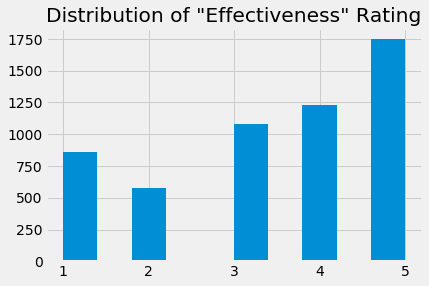

In [357]:
plt.hist(reviews['effectiveness'])
plt.title('Distribution of "Effectiveness" Rating')

(array([1575.,    0.,  579.,    0.,    0.,  879.,    0.,  904.,    0.,
        1558.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

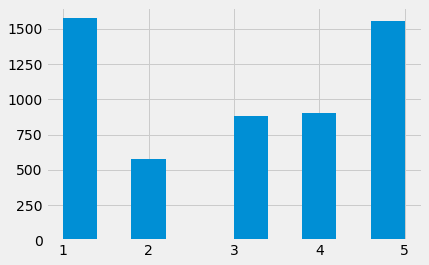

In [332]:
plt.hist(reviews['satisfaction'])

(array([ 437.,    0.,  278.,    0.,    0.,  666.,    0., 1276.,    0.,
        2838.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

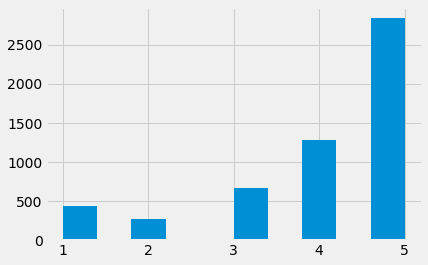

In [333]:
plt.hist(reviews['easeofuse'])

Text(0.5, 1.0, '15 Most Effective-Rated Medications')

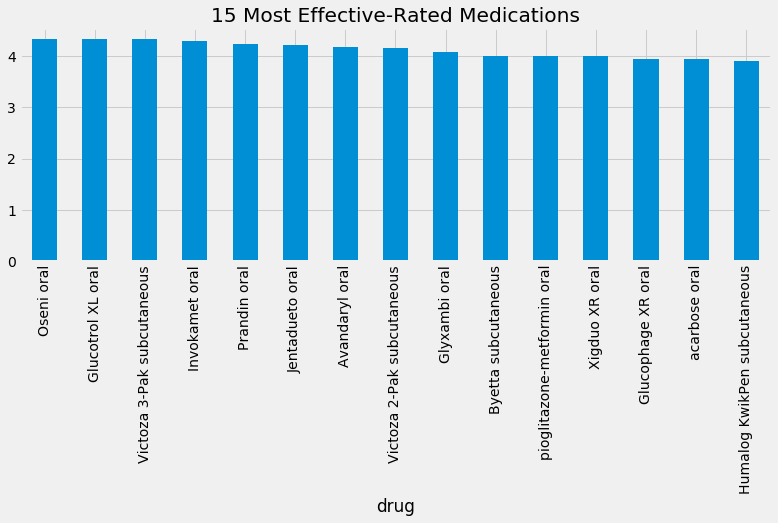

In [334]:
plt.figure(figsize=(12, 4))
drugs_group['effectiveness'].mean().sort_values(ascending=False).head(15).plot.bar()
plt.title('15 Most Effective-Rated Medications')

In [335]:
drugs_group.agg(['count', 'mean', 'std'])['satisfaction'].sort_values('mean', ascending=False).head(15)

,count,mean,std
drug,,,
Glucotrol XL oral,15,4.333333,1.175139
Avandaryl oral,12,4.000000,1.537412
Prandin oral,39,3.923077,1.364679
Jentadueto oral,14,3.857143,1.561909
Glyxambi oral,14,3.857143,1.747840
Xigduo XR oral,11,3.818182,1.834022
Victoza 2-Pak subcutaneous,51,3.745098,1.453866
Byetta subcutaneous,373,3.632708,1.457905
Victoza 3-Pak subcutaneous,21,3.619048,1.774153


Text(0.5, 1.0, '15 Most Satisfactory-Rated Medications')

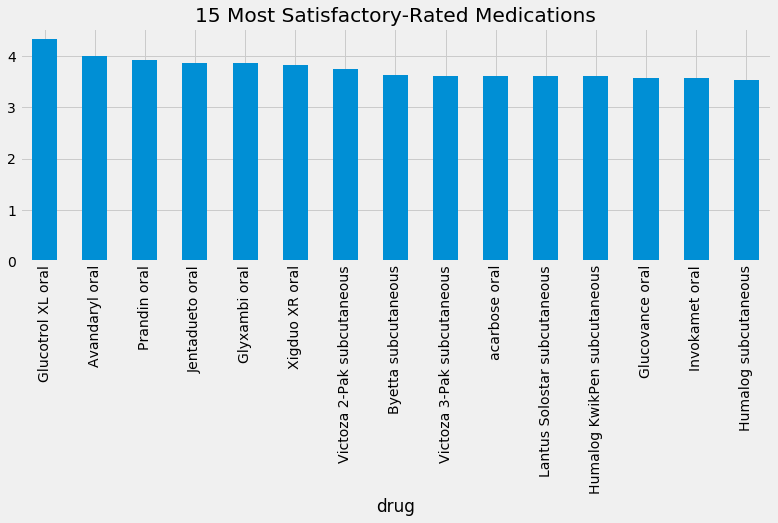

In [336]:
plt.figure(figsize=(12,4))
drugs_group['satisfaction'].mean().sort_values(ascending=False).head(15).plot.bar()
plt.title('15 Most Satisfactory-Rated Medications')

##### Question #2: How correlated are the ratings? (Effectiveness, Satisfaction, and Ease of Use)

In [337]:
corr = reviews.corr()
corr

,easeofuse,effectiveness,helpful,satisfaction
easeofuse,1.000000,0.542173,0.033950,0.547332
effectiveness,0.542173,1.000000,0.034671,0.806219
helpful,0.033950,0.034671,1.000000,0.026573
satisfaction,0.547332,0.806219,0.026573,1.000000


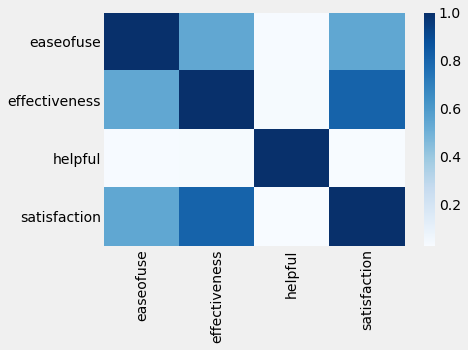

In [338]:
sns.heatmap(corr, cmap = 'Blues')

##### Observations:
 - 'Satisfaction' and 'Effectiveness' are highly (81%) correlated!
 - 'Ease of Use' is moderately (55%/54%) correlated with 'Satisfaction' and 'Effectiveness', respectively.
 - 'Helpful' votes appear to have no relationship to the 3 rating types.


##### Question #3: Is there any relationship between the length of review comments and their helpfulness?

In [339]:
reviews_comments = reviews.dropna()

Create a new DataFrame that drops null comments, and takes length of comment field.

In [340]:
reviews_comments['comment_len'] = [len(i) for i in reviews_comments.comment]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [341]:
reviews_comments.corr()[['comment_len']]

,comment_len
easeofuse,-0.001742
effectiveness,0.023101
helpful,0.325513
satisfaction,0.007487
comment_len,1.000000


Observation:
 - There exists a moderate (33%) correlation between the length of comments and how helpful WebMD visitors find them.

##### Question #4: Is there a significant difference in effectiveness between the 5 "most effective" medications?

###### NOTE: It is unknown if scraped data fits criteria of a proper ANOVA.  This ANOVA is performed for the sole purpose of exploratory data analysis.  In a traditional business environment, all assumptions would be heavily researched before making any interpretive claims.

 - homoscedasticity of dependent variable (equality of variances among group)

 - dependent variable is normally distributed within each group

 - each observation in the sample is independent from all other.

##### Steps to perform ANOVA (below):
 - 1) Import scipy to perform ANOVA
 - 2) Factorize all drugs to numerical representations
 - 3) Identify top 5 "most effective" medications
 - 4) Run ANOVA
 - 5) Analyze output

In [342]:
from scipy import stats

In [343]:
labels, uniques = pd.factorize(reviews.drug, sort=True)

In [344]:
labels

array([65, 65, 52, ..., 15, 15, 15])

Recall that there are 70 unique drugs that have reviews.  The factorized labels index on the unique, alphabetically sorted drug names.  This will allow for us to assign targets to analyze.

In [345]:
uniques

Index(['Actoplus MET oral', 'Actos oral',
       'Admelog U-100 Insulin lispro subcutaneous', 'Afrezza inhalation',
       'Amaryl oral', 'Apidra subcutaneous', 'Avandamet oral',
       'Avandaryl oral', 'Avandia oral', 'Bydureon subcutaneous',
       'Byetta subcutaneous', 'DUETACT oral', 'Farxiga oral', 'Fortamet oral',
       'Glucophage XR oral', 'Glucophage oral', 'Glucotrol XL oral',
       'Glucotrol oral', 'Glucovance oral', 'Glumetza oral', 'Glyxambi oral',
       'Humalog KwikPen subcutaneous',
       'Humalog Mix 75-25 KwikPen subcutaneous',
       'Humalog Mix 75-25 subcutaneous', 'Humalog subcutaneous',
       'Humulin 70-30 subcutaneous', 'Invokamet oral', 'Invokana oral',
       'Janumet XR oral', 'Janumet oral', 'Januvia oral', 'Jardiance oral',
       'Jentadueto oral', 'Kombiglyze XR oral', 'Lantus Solostar subcutaneous',
       'Lantus subcutaneous', 'Levemir FlexTouch subcutaneous',
       'Levemir Flexpen subcutaneous', 'Levemir subcutaneous',
       'Micronase ora

In [346]:
reviews['target'] = labels

In [347]:
reviews.sample(10) #Ensure that factorized targets are appended

,Rdatetime,comment,condition,drug,easeofuse,effectiveness,helpful,reviewer,satisfaction,target
4584,2009-02-17 14:17:23,bowel problems,Type 2 Diabetes Mellitus,Janumet oral,5,1,5,55-64 Male on Treatment for less than 1 month...,1,29
1716,2013-03-06 19:19:10,I still have to keep a strict carb intake arou...,Type 2 Diabetes Mellitus,metformin oral,5,3,0,"lmmickey, 45-54 Female on Treatment for 5 to ...",4,65
3251,2008-12-16 20:31:23,After using this drug i suffered a severe heat...,Type 2 Diabetes Mellitus,Actos oral,5,4,11,"Collegeman49, 55-64 Male on Treatment for 2 t...",4,1
2725,2013-12-25 17:17:08,IT'S BEEN 2 DAYS AND IT HAS LOWERED MY SUGAR D...,Type 2 Diabetes Mellitus,glyburide oral,5,4,4,"hughrwjr, 65-74 Male on Treatment for 2 to le...",4,63
2250,2008-05-21 21:58:26,I have been on this medication for 4 years and...,Type 2 Diabetes Mellitus,glipizide-metformin oral,3,3,0,"9N6WU2QM., 45-54 Male on Treatment for 2 to l...",1,62
2381,2016-04-06 21:53:20,My sugar levels went from the 200's to normal....,Type 2 Diabetes Mellitus,Trulicity subcutaneous,5,5,12,"Cheryl, 55-64 on Treatment for 1 to 6 months (...",5,55
3162,2008-03-26 17:05:09,Works well with insulin combo therapy.I wish a...,Type 2 Diabetes Mellitus,Actos oral,5,2,3,"silver lady, 55-64 Female on Treatment for 2 ...",2,1
2544,2010-07-01 18:53:35,Have noticed alot of water retention and extre...,Type 2 Diabetes Mellitus,Onglyza oral,5,5,12,65-74 Male on Treatment for 1 to 6 months (Pa...,5,44
304,2015-03-06 11:20:16,"My A1C has been up and down over the years, bu...",Type 2 Diabetes Mellitus,Farxiga oral,5,5,12,"yepitsme23, 35-44 Female on Treatment for 1 t...",5,12
2951,2008-11-17 18:26:59,"Cold hands and feet, weight gain and some ED e...",Type 2 Diabetes Mellitus,Avandamet oral,4,2,4,45-54 Male on Treatment for 1 to 6 months (Pa...,1,6


Text(0.5, 1.0, '5 Most Effective-Rated Medications')

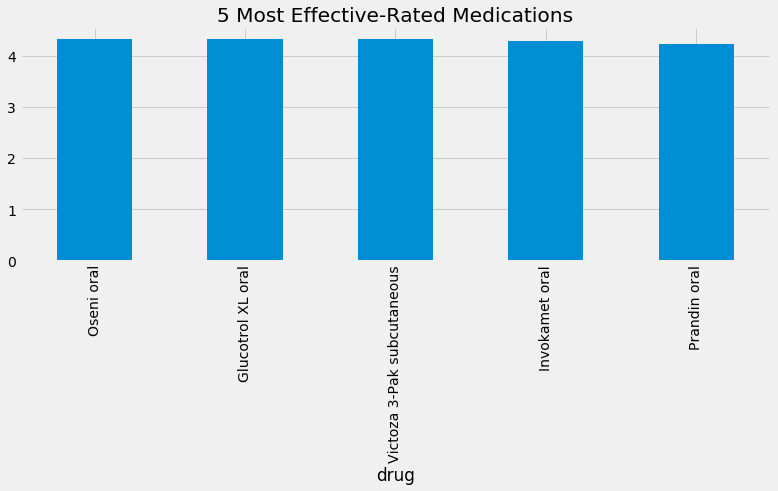

In [348]:
plt.figure(figsize=(12, 4))
drugs_group['effectiveness'].mean().sort_values(ascending=False).head(5).plot.bar()
plt.title('5 Most Effective-Rated Medications')

In [349]:
oseni_eff = reviews.effectiveness[reviews['target']==45]
gluco_eff = reviews.effectiveness[reviews['target']==16]
victo_eff = reviews.effectiveness[reviews['target']==57]
invok_eff = reviews.effectiveness[reviews['target']==27]
prand_eff = reviews.effectiveness[reviews['target']==47]

In [350]:
stats.f_oneway(oseni_eff, gluco_eff, victo_eff, invok_eff, prand_eff)

F_onewayResult(statistic=1.7595327224987725, pvalue=0.13726542922801352)

Observation:
 - Pvalue of 13.7% accepts the null hypothesis that there is no significant difference among effectiveness of top 5 medications.